In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

[85.0, 35.64705882352941, 25.96006600660066, 25.45375608639825, 25.02630599745176, 24.638948783124317]


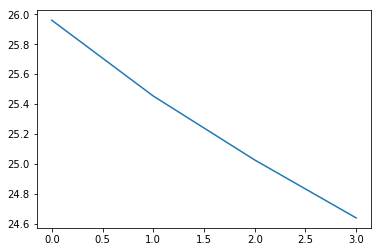

In [2]:
d = [1, 85, 3030, 78659, 2002167, 50106844, 1234579963]
s = [d[i+1]/d[i] for i in range(len(d)-1)]
print(s)
plt.plot(s[2:])

[  0.02973818  -0.52829471  25.95812766]
25.96 25.45 25.03 24.64
25.96 25.46 25.02 24.64 24.32 24.06 23.86


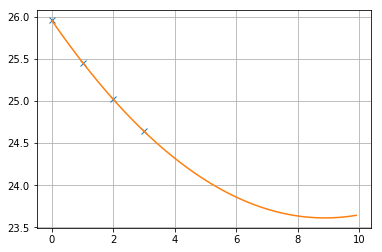

In [3]:
p = np.polyfit(np.arange(len(s)-2), s[2:], 2)
print(p)
plt.plot(s[2:], "x")
x = np.arange(0, 10, 0.1)
plt.plot(x, np.polyval(p, x))
plt.grid()
S = np.polyval(p, range(-2, 7))
print(*["%.2f" % v for v in s[2:]])
print(*["%.2f" % v for v in S[2:]])

In [4]:
print(d[-1])
print(d[-1]*24.32)
print(d[-1]*24.32*24.06)
print(d[-1]*24.32*24.06*23.86)

1234579963
30024984700.16
722401131885.8496
17236491006796.371


In [5]:
N=5
mask = (1 << N)-1

def rol(x):
    t = (x << 1) & mask
    return t | (x >> (N-1))

def ror(x):
    t = (x << (N-1)) & mask
    return t | (x >> 1)

def add(x, y):
    return (x + y) & mask

def mybin(x):
    return bin(x)[2:].rjust(N, "0")

# -- unit swap --
# INIT      ->  31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0
# ROR  2    ->   1  0 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2
# UNSFHL 15 ->   1 31 29 27 25 23 21 19 17 15 13 11  9  7  5  3  0 30 28 26 24 22 20 18 16 14 12 10  8  6  4  2
# ROR 31    ->  31 29 27 25 23 21 19 17 15 13 11  9  7  5  3  0 30 28 26 24 22 20 18 16 14 12 10  8  6  4  2  1
# SHFL 15   ->  31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  0  1

for x in range(32):
    x_add = add(x, -2)
    x_ror = ror(x_add)
    x_sub = add(x_ror, 1)
    x_rol = rol(x_sub)
    print("%2d" % x, "%2d" % x_rol, mybin(x), mybin(x_add), mybin(x_ror), mybin(x_sub), mybin(x_rol))

 0  1 00000 11110 01111 10000 00001
 1  0 00001 11111 11111 00000 00000
 2  2 00010 00000 00000 00001 00010
 3  3 00011 00001 10000 10001 00011
 4  4 00100 00010 00001 00010 00100
 5  5 00101 00011 10001 10010 00101
 6  6 00110 00100 00010 00011 00110
 7  7 00111 00101 10010 10011 00111
 8  8 01000 00110 00011 00100 01000
 9  9 01001 00111 10011 10100 01001
10 10 01010 01000 00100 00101 01010
11 11 01011 01001 10100 10101 01011
12 12 01100 01010 00101 00110 01100
13 13 01101 01011 10101 10110 01101
14 14 01110 01100 00110 00111 01110
15 15 01111 01101 10110 10111 01111
16 16 10000 01110 00111 01000 10000
17 17 10001 01111 10111 11000 10001
18 18 10010 10000 01000 01001 10010
19 19 10011 10001 11000 11001 10011
20 20 10100 10010 01001 01010 10100
21 21 10101 10011 11001 11010 10101
22 22 10110 10100 01010 01011 10110
23 23 10111 10101 11010 11011 10111
24 24 11000 10110 01011 01100 11000
25 25 11001 10111 11011 11100 11001
26 26 11010 11000 01100 01101 11010
27 27 11011 11001 11100 1110